In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

#Purpose: to find the differences in performance between data manipulation types
#Final product: to get a dataframe that will create a proportional stacked bar chart by fertilizer type

df = pd.read_csv('../data/FertilizersProduct.csv')
df.head()

final_times = dict()
iterations = 50
divisor = 100

store_time = np.empty(shape=iterations, dtype='float64')
time_std = np.empty(shape=6, dtype='float64')

In [2]:
#Vectorization - uses built in math ops or converting between wide/long or use groupby/filter/transform...
#Does not work well with incomplete datasets (with nan)

for i in range(iterations):
    dfpivot = df.copy(deep=False)

    start = time.time()

    dfpivot = dfpivot[dfpivot['Unit']=='tonnes'].drop(columns=['Unit'])
    dfpivot = dfpivot.groupby(['Area','Item'], as_index=False)['Value'].sum()
    dfpivot = dfpivot.pivot(index='Area', columns='Item', values='Value')

    dfpivot = dfpivot.fillna(0.0)

    store_time[i] = time.time()-start

print("Vectorization took: ",np.mean(store_time)," seconds")

final_times['Vect'] = np.mean(store_time)
time_std[0] = np.std(store_time)

dfpivot.head()

Vectorization took:  0.15627238750457764  seconds


Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [3]:
#Apply - works on columns/rows to apply mathematical functions
#Must be a uniform application

for i in range(iterations):
    dfapply = df.copy(deep=False)

    start = time.time()


    dfapply = dfapply[['Area','Item','Unit','Value']]
    dfapply = dfapply[dfapply['Unit'].apply(lambda x: x=='tonnes')]
    dfapply.drop(columns=['Unit'], inplace=True)
    dfapply = dfapply.groupby(['Area','Item'], as_index=False)['Value'].sum()
    dfapply = dfapply.pivot(index='Area', columns='Item', values='Value')
    dfapply = dfapply.fillna(0.0)

    store_time[i] = time.time()-start


print('Apply took ', np.mean(store_time),' seconds')

final_times['Apply'] = np.mean(store_time)
time_std[1] = np.std(store_time)

dfapply.head()

Apply took  0.21609234809875488  seconds


Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [4]:
#List comprehension - create/manipulate lists in a single line modified for loop
#Can become incomprehensible if too long

for i in range(iterations):
    dflist = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

    start = time.time()


    total = dict()
    combined = [list(row) for row in zip(df['Area'],df['Item'],df['Unit'],df['Value']) if row[2]=='tonnes']

    for item in combined:
        item = '_'.join(item[0:3])
        total[item] = 0

    for item in combined:
        key = '_'.join(item[0:3])
        if isinstance(item[3], float):
            total[key] += item[3]

    for k,v in total.items():
        items = k.split('_')
        dflist.at[items[0],items[1]] = v

    dflist = dflist.fillna(0.0)

    store_time[i] = time.time()-start


print('List comprehension took ',np.mean(store_time),' seconds')

final_times['List'] = np.mean(store_time)
time_std[2] = np.std(store_time)

dflist.head()

List comprehension took  1.3128467082977295  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [5]:
#Cython - uses C framework to implement Python code
#Does not perform as well if iterating through to access the file
#Not easy to test without building pyx file each time


import fertilizerprocessor


for i in range(iterations):
    dfcython = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

    start = time.time()

    dataframedict = fertilizerprocessor.fertilizerCount(df['Area'].tolist(), df['Item'].tolist(), df['Unit'].tolist(), df['Value'].tolist())


    for k,v in dataframedict.items():
        items = k.split('_')
        dfcython.at[items[0],items[1]] = v

    dfcython = dfcython.fillna(0.0)

    store_time[i] = time.time()-start


print('Cython took: ',np.mean(store_time),' seconds')

final_times['Cython'] = np.mean(store_time)
time_std[3] = np.std(store_time)

dfcython.head()



Cython took:  0.580419945716858  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [6]:
#Itertuples - creates tuples of each row which can then be accessed
#Iterates through each row which is quite inefficient

for i in range(iterations):
    dftuples = pd.DataFrame(index=np.unique(df['Area']), columns=np.unique(df['Item']))

    start = time.time()

    dftuples = dftuples.fillna(0.0)

    for row in df.itertuples(index=False, name='Row'):
        if row.Unit=='tonnes':
             dftuples.at[row.Area, row.Item] += row.Value

    store_time[i] = time.time()-start

print('Itertuples took ',np.mean(store_time),' seconds')

final_times['Itertuples'] = np.mean(store_time)
time_std[4] = np.std(store_time)

dftuples.head()

Itertuples took  3.481530261039734  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [7]:
#Iterrows - iterates through each row
#Inefficient by producing Pandas Series and index from each row

for i in range(iterations):
    dfrows = pd.DataFrame(index=np.unique(df['Area']), columns=np.unique(df['Item']))

    start = time.time()

    dfrows = dfrows.fillna(0.0)

    for index, row in df.iterrows():
        if row['Unit']=='tonnes':
             dfrows.at[row['Area'], row['Item']] += row['Value']

    store_time[i] = time.time()-start

print('Iterrows took ',np.mean(store_time),' seconds')

final_times['Iterrows'] = np.mean(store_time)
time_std[5] = np.std(store_time)

dfrows.head()

Iterrows took  29.201727032661438  seconds


,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [8]:
dffinal = dfpivot.copy(deep=False)
dffinal.head()

Item,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,Other NK compounds,Other NP compounds,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.56,3244.57,28.34,20.03,67393.32,42464.99,3444.53,105892.68,0.0,163301.41,...,0.26,14176.45,543.43,0.07,23.90,17.85,13448.58,0.00,1616890.03,5.25
Albania,1120.54,1001720.59,1953.95,16113.21,532561.01,18351.73,1245.36,130420.00,0.0,31440.98,...,4094.71,6281.35,2740.46,418.36,3681.60,6431.68,569761.33,38753.00,967101.33,104.80
Algeria,9993103.16,2117203.14,199644.67,167570.44,58572.51,92574.98,257234.52,2933324.71,0.0,146740.93,...,57253.36,26503675.84,106605.88,71239.21,692694.37,3745.73,869833.80,131825.00,11192522.82,3587527.80
Angola,493.25,133245.73,270978.84,944.01,3925.10,81258.44,1915.74,599950.71,0.0,10150.54,...,58616.51,1446.86,97073.91,1843.15,3097.75,633.98,6881.57,650.44,148596.06,2173.38
Antigua and Barbuda,44.96,369.22,25.51,0.05,82.76,1856.54,0.02,4000.68,0.0,103.18,...,329.88,5.03,0.43,1.20,25.32,0.00,0.01,1.00,42.74,0.01


In [9]:
#Get most popular fertilizers/countries
dffinal = dffinal.reindex(dffinal.median().sort_values(ascending=False).index, axis=1)
dffinal = dffinal.T
dffinal = dffinal.reindex(dffinal.median().sort_values(ascending=False).index, axis=1)

dffinal = dffinal.head(10)
dffinal = dffinal.iloc[:,:10]
dffinal = dffinal.T
dffinal.head()

Item,Urea,NPK fertilizers,Ammonium nitrate (AN),Ammonium sulphate,Potassium chloride (muriate of potash) (MOP),"Other nitrogenous fertilizers, n.e.c.",Fertilizers n.e.c.,Diammonium phosphate (DAP),Other NP compounds,Monoammonium phosphate (MAP)
Area,,,,,,,,,,
United States of America,1.772620e+08,7.653178e+07,3.904783e+07,64589402.11,2.169543e+08,9027978.27,3794698.92,1.451715e+08,35681822.93,1.176395e+08
Brazil,1.037788e+08,1.222563e+07,3.558293e+07,53847434.37,1.994394e+08,3290130.55,2876219.20,1.194384e+07,26170408.72,8.431548e+07
Russian Federation,1.336390e+08,9.914655e+07,1.289251e+08,27512869.09,2.260886e+08,1026456.91,1131338.91,3.458852e+07,53168097.41,3.008688e+07
France,2.230109e+07,2.571599e+07,1.896307e+07,6895795.15,1.856838e+07,4290671.97,1520061.98,9.059062e+06,5699185.62,9.997790e+05
"China, mainland",9.094902e+07,2.606369e+08,5.722064e+06,32442764.15,1.119232e+08,12421062.61,5066647.57,6.566472e+07,11402729.85,1.794474e+07


In [10]:
#Get proportion of each fertilizer
dffinal = dffinal.apply(lambda x: x/x.sum()*100, axis = 1)
dffinal.head()

Item,Urea,NPK fertilizers,Ammonium nitrate (AN),Ammonium sulphate,Potassium chloride (muriate of potash) (MOP),"Other nitrogenous fertilizers, n.e.c.",Fertilizers n.e.c.,Diammonium phosphate (DAP),Other NP compounds,Monoammonium phosphate (MAP)
Area,,,,,,,,,,
United States of America,20.013755,8.640816,4.408693,7.292463,24.495210,1.019303,0.428440,16.390582,4.028654,13.282084
Brazil,19.453528,2.291718,6.670087,10.093802,37.385291,0.616741,0.539153,2.238896,4.905692,15.805093
Russian Federation,18.174424,13.483578,17.533358,3.741652,30.747238,0.139594,0.153858,4.703916,7.230672,4.091709
France,19.560118,22.555294,16.632363,6.048249,16.286183,3.763315,1.333235,7.945634,4.998712,0.876898
"China, mainland",14.808352,42.436993,0.931668,5.282342,18.223370,2.022402,0.824953,10.691553,1.856597,2.921770


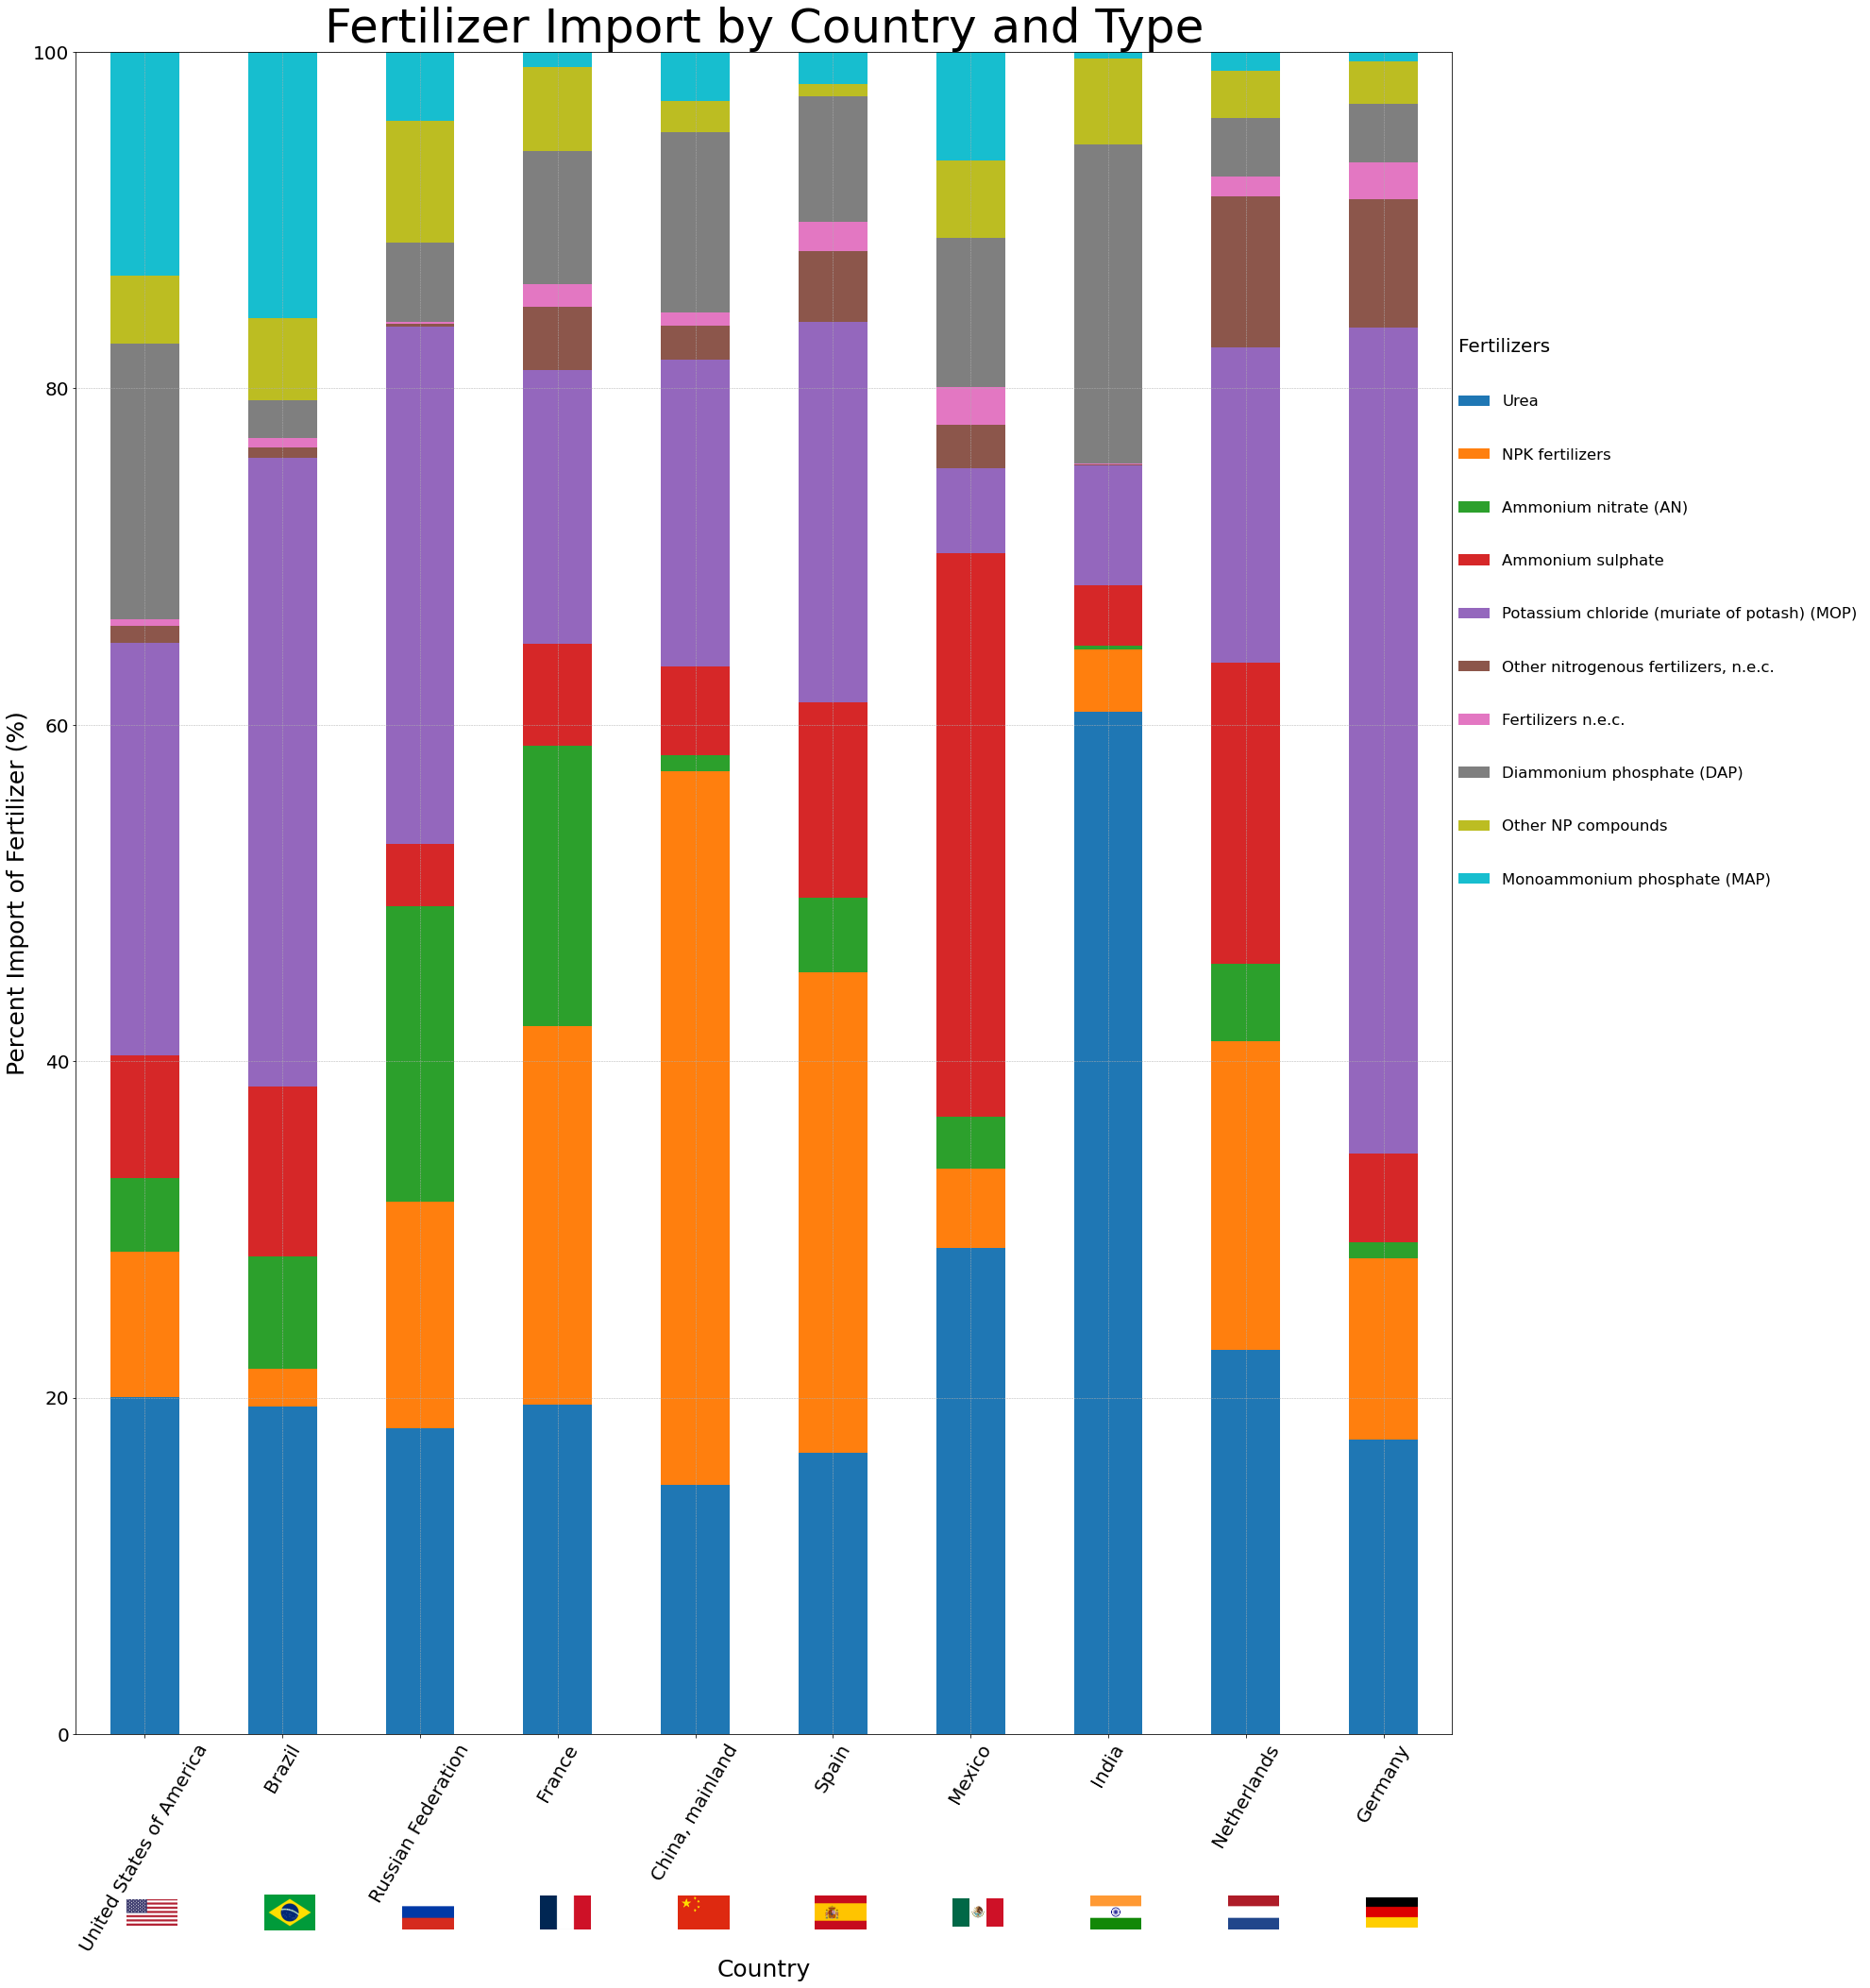

In [11]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
ax.set_title('Fertilizer Import by Country and Type', fontsize=50)
dffinal.plot(ax=ax,kind='bar',stacked=True)
ax.set_xlabel('Country', fontsize=25)
ax.set_xticklabels(labels=dffinal.index.values.tolist(), fontsize=20, rotation=60)
ax.set_yticklabels(labels=np.arange(0, 101, 20), fontsize=20)
ax.set_ylabel('Percent Import of Fertilizer (%)', fontsize=25)
ax.grid(True, linestyle='dashed', linewidth=0.5)

plt.subplots_adjust(top=0.95)
plt.ylim([0, 100])
leg = plt.legend(dffinal.columns.to_list(),loc=(1,0.5), frameon=False, title='Fertilizers', title_fontsize=20, fontsize=16.5, labelspacing=2.5)
leg._legend_box.align = 'left'
flags = ['USA.png', 'Brazil.png', 'Russia.png', 'France.png', 'China.png', 'Spain.png', 'Mexico.png', 'India.png', 'Netherlands.png', 'Germany.png']

placement = 0.15
for img in flags:
    img = '../data/flags/'+img
    flag_img = mpimg.imread(img)
    imax = fig.add_axes([placement, 0.025, 0.025, 0.025])
    imax.imshow(flag_img)
    imax.axis('off')
    placement+=0.0675

fig.subplots_adjust(right=0.8)
fig.savefig('../output/fertilizerbycountrybarplot.png')

In [12]:
#Get average final time in a dataframe
timedf = pd.DataFrame(final_times.items(), columns=['Type','Time'])
timedf['Std'] = time_std

timedf.head()

,Type,Time,Std
0,Vect,0.156272,0.011120
1,Apply,0.216092,0.048928
2,List,1.312847,0.312840
3,Cython,0.580420,0.092601
4,Itertuples,3.481530,1.959589


<ipython-input-51-8fa433094d3a>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


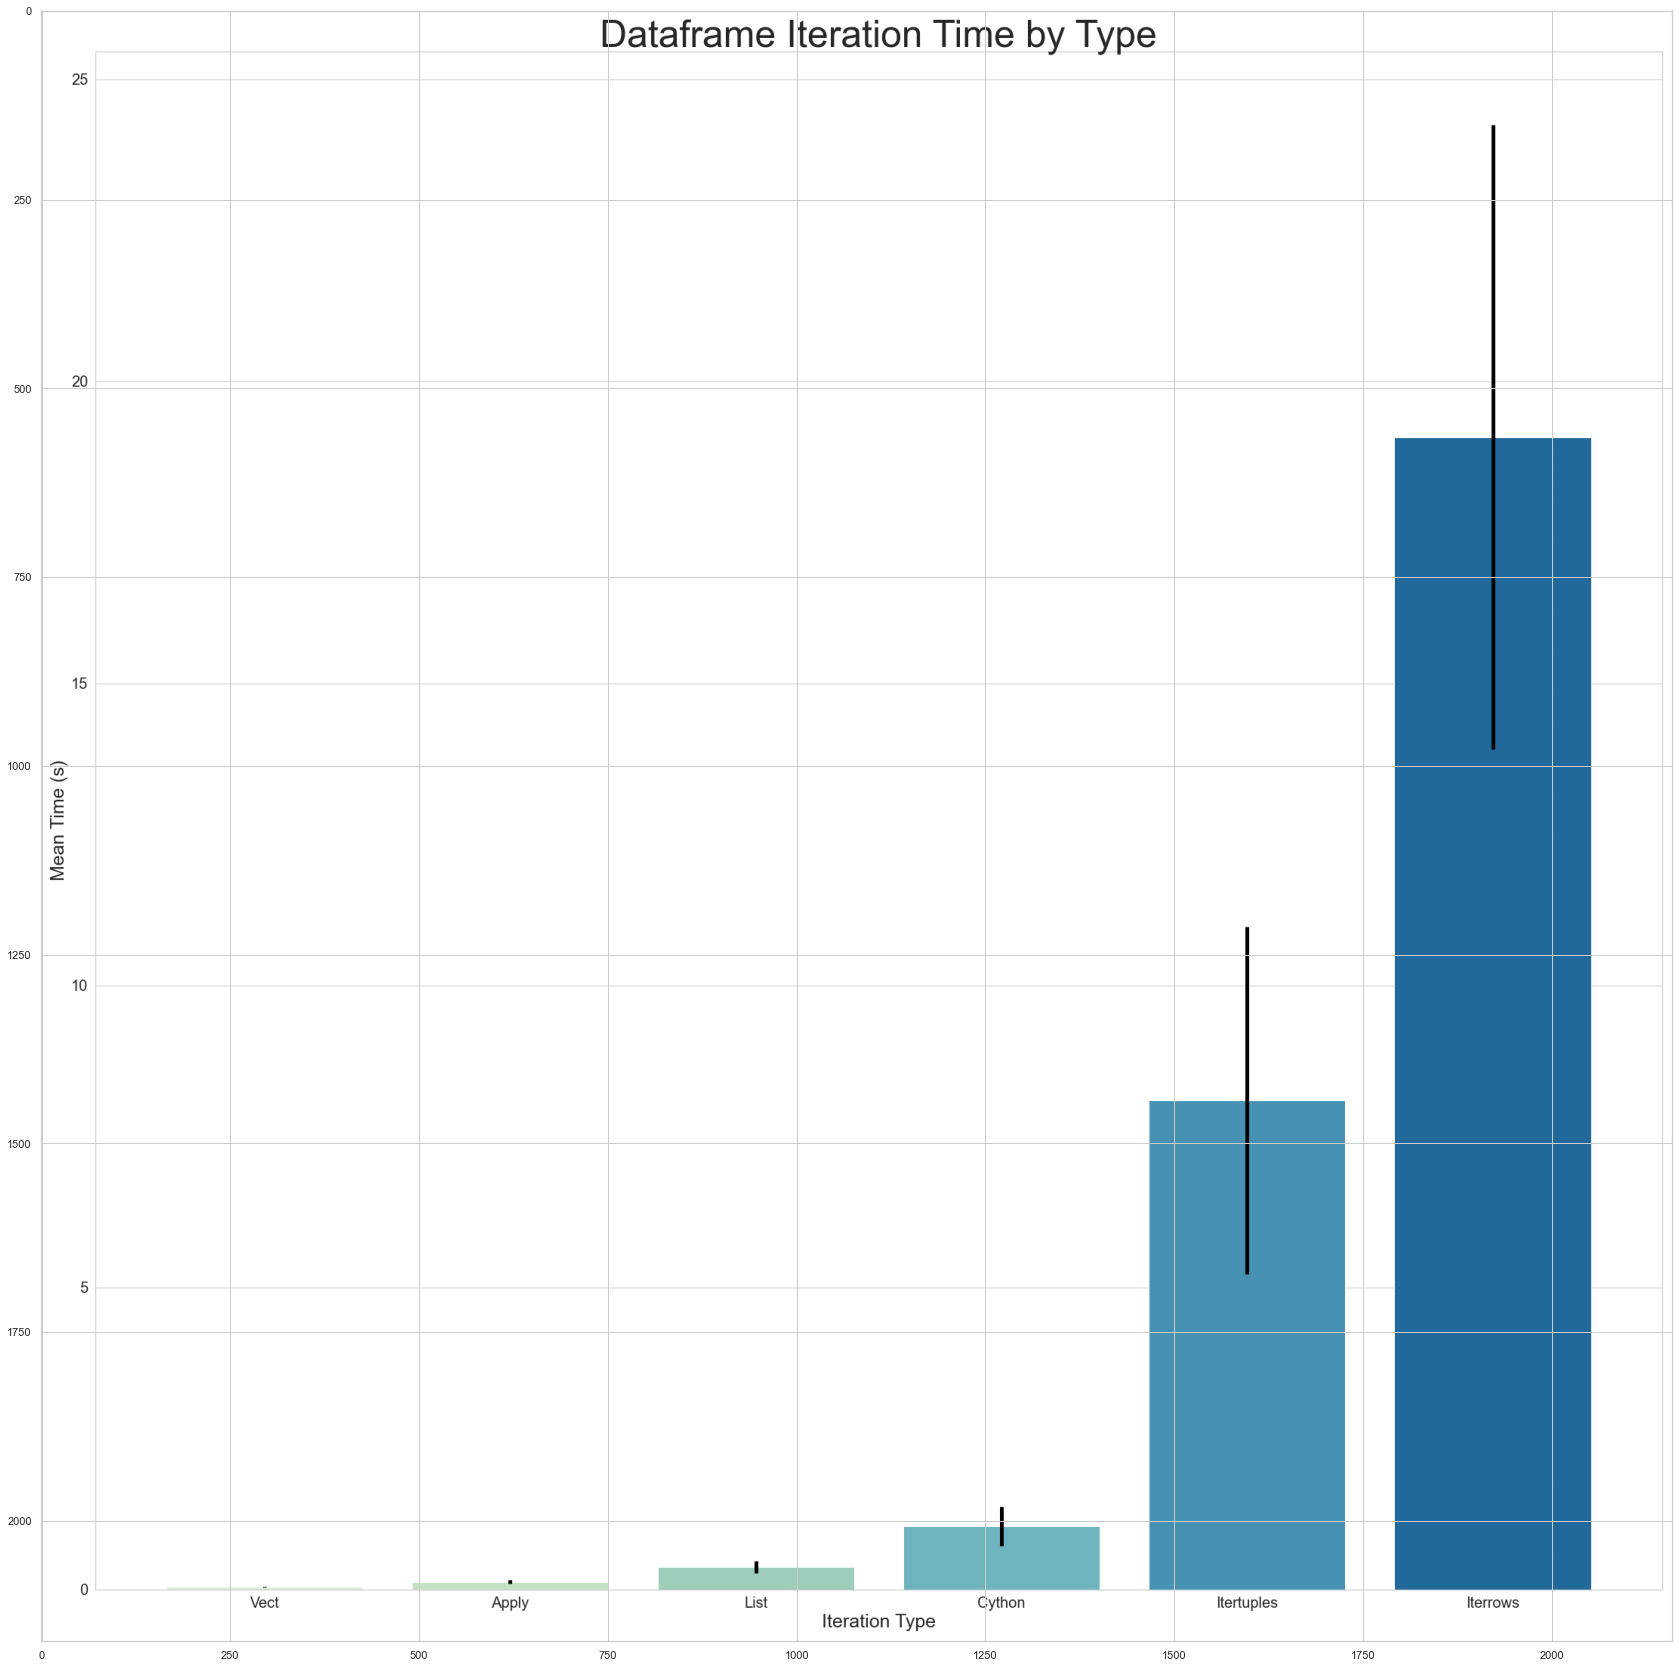

In [51]:
sns.set(style='whitegrid')

fig1 = plt.figure(figsize=(30,30))
ax1 = fig1.add_subplot(111)


ax1 = sns.barplot(x='Type', y='Time', data=timedf, palette = sns.color_palette('GnBu'), ci='sd')
plt.errorbar(x=timedf['Type'], y=timedf['Time'], yerr=timedf['Std'], ls='none', elinewidth=5, ecolor='black')

ax1.set_xlabel('Iteration Type', fontsize=25)
ax1.set_ylabel('Mean Time (s)', fontsize=25)
ax1.set_title('Dataframe Iteration Time by Type', fontsize=50)

ax1.tick_params(labelsize=20)

plt.tight_layout()

fig1.show()
fig1.savefig('../output/iterationtypetimebarplot.png')

In [14]:
#Remove rows for time

#Vectorization

df = pd.read_csv('../data/FertilizersProduct.csv')
vect_time = np.empty(shape=int(df.shape[0]/divisor), dtype='float64')

counter = 0
while df.shape[0]>divisor:

    dfpivot = df.copy(deep=False)

    start = time.time()

    dfpivot = dfpivot[dfpivot['Unit']=='tonnes'].drop(columns=['Unit'])
    dfpivot = dfpivot.groupby(['Area','Item'], as_index=False)['Value'].sum()
    dfpivot = dfpivot.pivot(index='Area', columns='Item', values='Value')

    dfpivot = dfpivot.fillna(0.0)


    vect_time[counter] = time.time()-start
    df.drop(df.tail(divisor).index, inplace=True)
    counter+=1


df.head()


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [15]:
#Apply

df = pd.read_csv('../data/FertilizersProduct.csv')
apply_time = np.empty(shape=int(df.shape[0]/divisor), dtype='float64')

counter = 0
while df.shape[0]>divisor:

    dfapply = df.copy(deep=False)

    start = time.time()


    dfapply = dfapply[['Area','Item','Unit','Value']]
    dfapply = dfapply[dfapply['Unit'].apply(lambda x: x=='tonnes')]
    dfapply.drop(columns=['Unit'], inplace=True)
    dfapply = dfapply.groupby(['Area','Item'], as_index=False)['Value'].sum()
    dfapply = dfapply.pivot(index='Area', columns='Item', values='Value')
    dfapply = dfapply.fillna(0.0)

    apply_time[counter] = time.time()-start
    df.drop(df.tail(divisor).index, inplace=True)
    counter+=1

df.head()


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [16]:
#List comprehension

df = pd.read_csv('../data/FertilizersProduct.csv')
list_time = np.empty(shape=int(df.shape[0]/divisor), dtype='float64')

counter = 0
while df.shape[0]>divisor:

    dflist = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

    start = time.time()


    total = dict()
    combined = [list(row) for row in zip(df['Area'],df['Item'],df['Unit'],df['Value']) if row[2]=='tonnes']

    for item in combined:
        item = '_'.join(item[0:3])
        total[item] = 0

    for item in combined:
        key = '_'.join(item[0:3])
        if isinstance(item[3], float):
            total[key] += item[3]

    for k,v in total.items():
        items = k.split('_')
        dflist.at[items[0],items[1]] = v

    dflist = dflist.fillna(0.0)

    list_time[counter] = time.time()-start
    df.drop(df.tail(divisor).index, inplace=True)
    counter+=1

df.head()


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [17]:
#Cython

import fertilizerprocessor

df = pd.read_csv('../data/FertilizersProduct.csv')
cython_time = np.empty(shape=int(df.shape[0]/divisor), dtype='float64')

counter = 0
while df.shape[0]>divisor:
    dfcython = pd.DataFrame(index=np.unique(df['Area']),columns=np.unique(df['Item']))

    start = time.time()

    dataframedict = fertilizerprocessor.fertilizerCount(df['Area'].tolist(), df['Item'].tolist(), df['Unit'].tolist(), df['Value'].tolist())


    for k,v in dataframedict.items():
        items = k.split('_')
        dfcython.at[items[0],items[1]] = v

    dfcython = dfcython.fillna(0.0)

    cython_time[counter] = time.time()-start
    df.drop(df.tail(divisor).index, inplace=True)
    counter+=1

df.head()


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [18]:
#Itertuples

df = pd.read_csv('../data/FertilizersProduct.csv')
itertuples_time = np.empty(shape=int(df.shape[0]/divisor), dtype='float64')

counter=0
while df.shape[0]>divisor:
    dftuples = pd.DataFrame(index=np.unique(df['Area']), columns=np.unique(df['Item']))

    start = time.time()

    dftuples = dftuples.fillna(0.0)

    for row in df.itertuples(index=False, name='Row'):
        if row.Unit=='tonnes':
             dftuples.at[row.Area, row.Item] += row.Value

    itertuples_time[counter] = time.time()-start
    df.drop(df.tail(divisor).index, inplace=True)
    counter+=1

df.head()



,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [27]:
#Iterrows

df = pd.read_csv('../data/FertilizersProduct.csv')
iterrows_time = np.empty(shape=int(df.shape[0]/divisor), dtype='float64')

counter=0
while df.shape[0]>divisor:
    dfrows = pd.DataFrame(index=np.unique(df['Area']), columns=np.unique(df['Item']))

    start = time.time()

    dfrows = dfrows.fillna(0.0)

    for index, row in df.iterrows():
        if row['Unit']=='tonnes':
             dfrows.at[row['Area'], row['Item']] += row['Value']

    iterrows_time[counter] = time.time()-start
    df.drop(df.tail(divisor).index, inplace=True)
    counter+=1

df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [32]:
timeeqdf = pd.DataFrame(list(zip(vect_time, apply_time, list_time, cython_time, itertuples_time, iterrows_time)), columns=['Vect','Apply','List','Cython','Itertuples','Iterrows'])
timeeqdf.head()

,Vect,Apply,List,Cython,Itertuples,Iterrows
0,0.074909,0.093701,0.390679,0.343668,3.139880,42.028326
1,0.062485,0.109349,0.421776,0.374913,2.530645,45.349225
2,0.078106,0.093725,0.406108,0.343668,2.327573,39.007013
3,0.078105,0.078110,0.374910,0.281183,2.436923,39.571283
4,0.078106,0.093728,0.390533,0.296804,2.374436,38.224338


In [33]:
timeeqdf = timeeqdf.reindex(index=timeeqdf.index[::-1])
timeeqdf.head()

,Vect,Apply,List,Cython,Itertuples,Iterrows
163,0.015623,0.000000,0.015623,0.000000,0.031245,0.203766
162,0.000000,0.000000,0.015620,0.015625,0.046863,0.333390
161,0.015621,0.015584,0.031244,0.015618,0.078104,0.464902
160,0.015621,0.015613,0.031242,0.000000,0.109349,0.606507
159,0.015620,0.015624,0.031242,0.015622,0.124966,0.738559


In [34]:
timeeqdf.reset_index(inplace=True)
timeeqdf.head()

,index,Vect,Apply,List,Cython,Itertuples,Iterrows
0,163,0.015623,0.000000,0.015623,0.000000,0.031245,0.203766
1,162,0.000000,0.000000,0.015620,0.015625,0.046863,0.333390
2,161,0.015621,0.015584,0.031244,0.015618,0.078104,0.464902
3,160,0.015621,0.015613,0.031242,0.000000,0.109349,0.606507
4,159,0.015620,0.015624,0.031242,0.015622,0.124966,0.738559


In [35]:
timeeqdf = pd.melt(timeeqdf, ['index'])
timeeqdf.head()

,index,variable,value
0,163,Vect,0.015623
1,162,Vect,0.000000
2,161,Vect,0.015621
3,160,Vect,0.015621
4,159,Vect,0.015620


In [41]:
#Output stats of graph
iter_types = ['Vect','Apply','List','Cython','Itertuples','Iterrows']
statsdf = pd.DataFrame(columns=['type','slope','intercept','r_value','p_value','std_err'])

for i, type in enumerate(iter_types):
    slope, intercept, r_value, p_value, std_err = stats.linregress(timeeqdf.loc[timeeqdf['variable']==type, 'index'], timeeqdf.loc[timeeqdf['variable']==type, 'value'])
    statsdf.iloc[:,i] = [type, slope, intercept, r_value, p_value, std_err]

statsdf.to_csv('../output/iterationtypetimelinestats.csv', index=False)
statsdf.head()

,type,slope,intercept,r_value,p_value,std_err
0,Vect,Apply,List,Cython,Itertuples,Iterrows
1,-0.000333368,-0.00047227,-0.00183345,-0.00199131,-0.0174765,-0.19212
2,0.0653463,0.0869728,0.382558,0.339139,3.06838,29.7338
3,-0.906956,-0.943718,-0.868344,-0.89854,-0.94123,-0.802839
4,1.02272e-62,9.55704e-80,3.30793e-51,8.02168e-60,2.87396e-78,3.18782e-38


<ipython-input-50-ffa07bf2dc0f>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


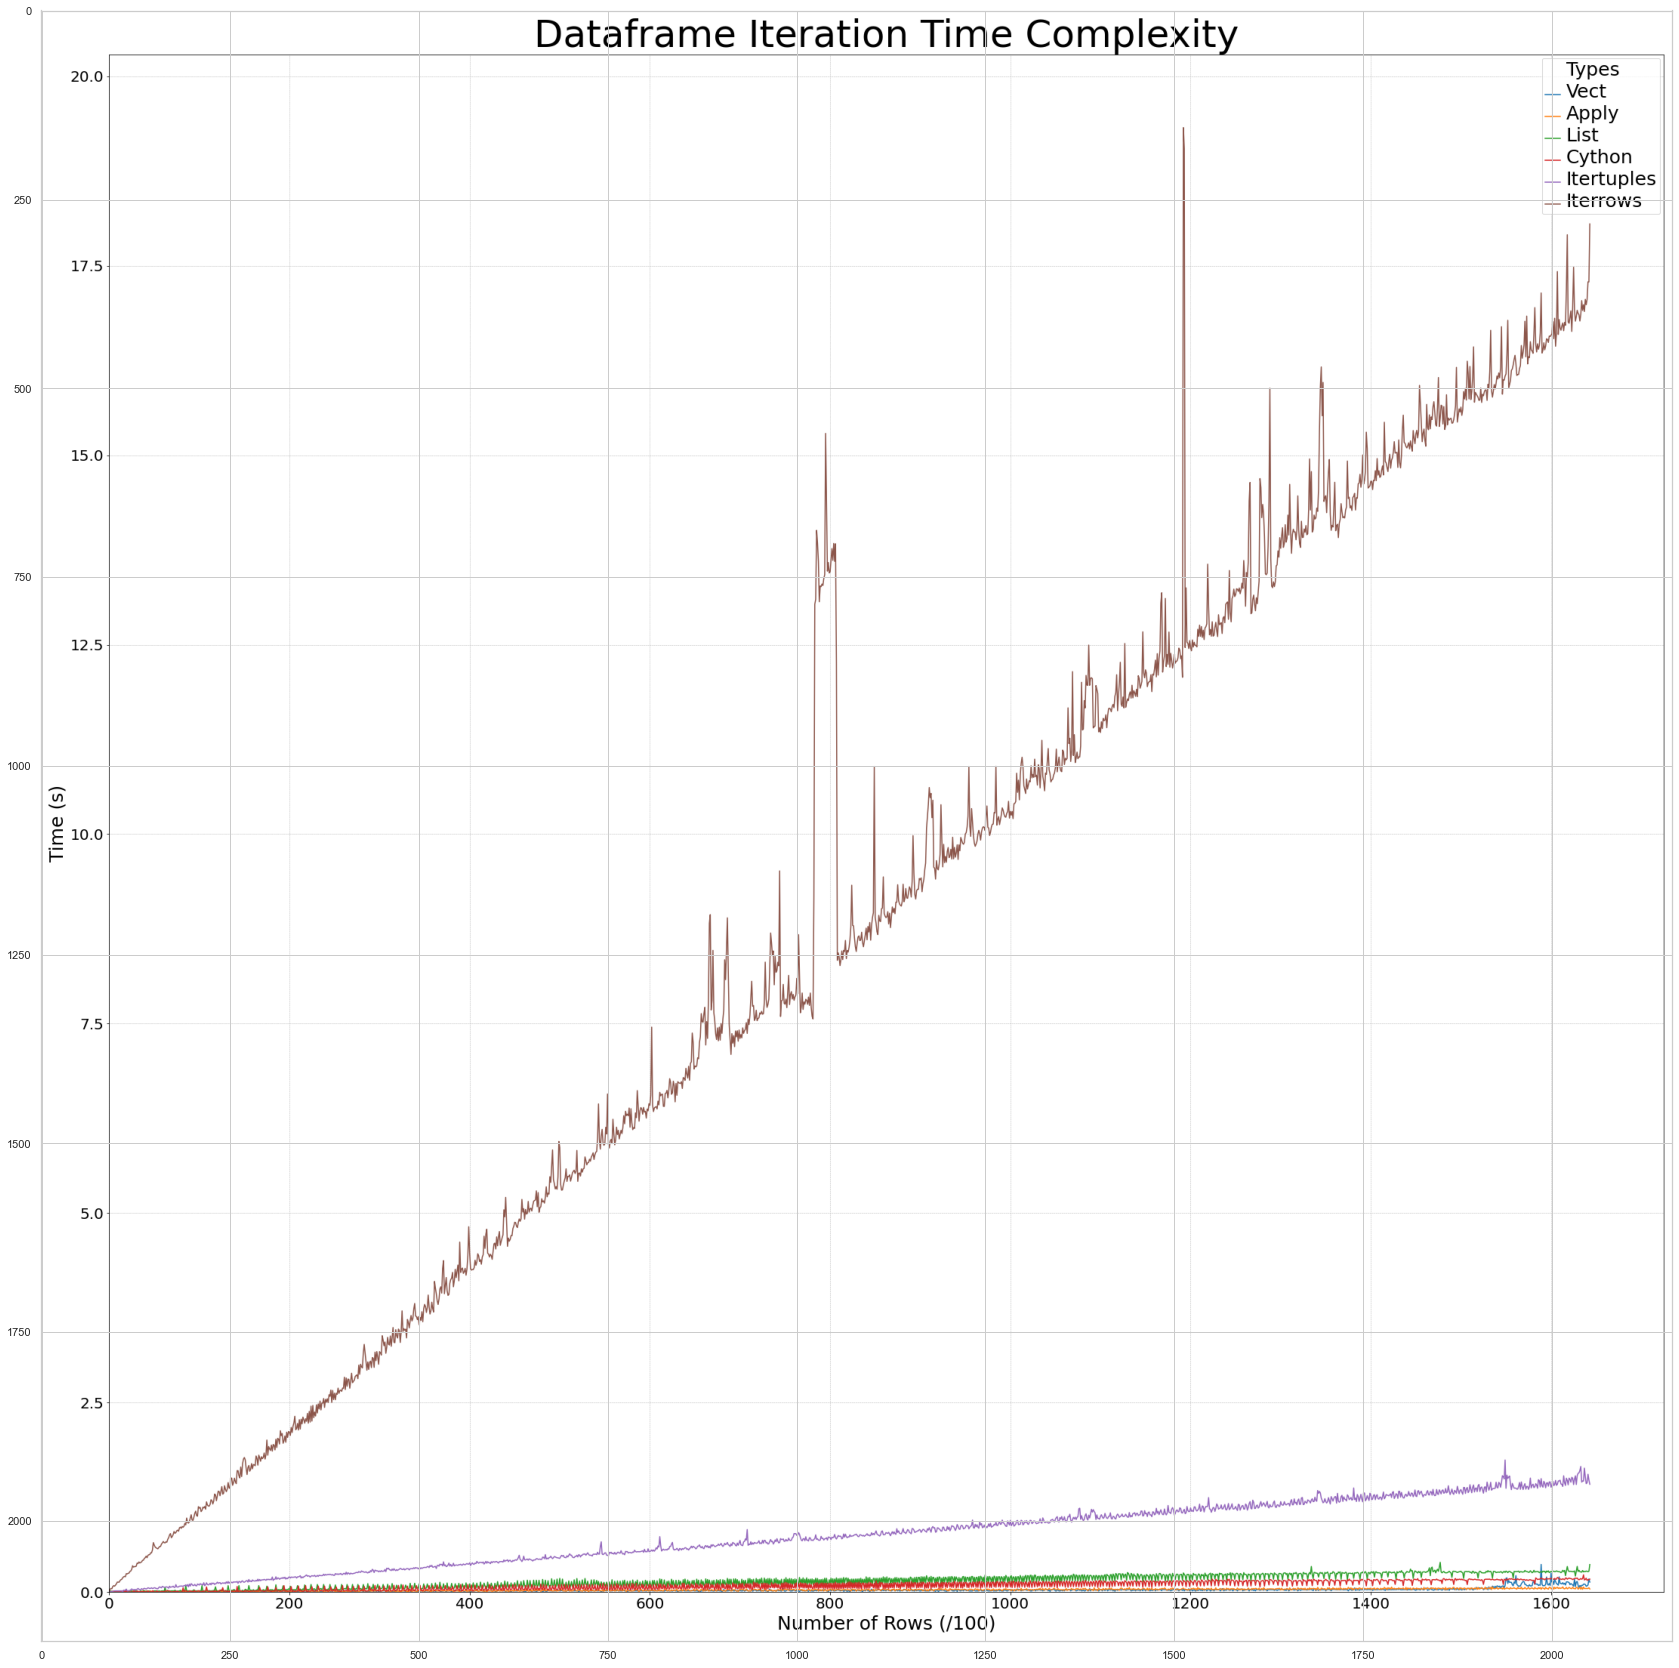

In [50]:
fig2 = plt.figure(figsize=(30,30))
ax2 = fig2.add_subplot(111)


sns.lineplot(x='index', y='value', hue='variable', data=timeeqdf, ax=ax2)

ax2.set_title('Dataframe Iteration Time Complexity', fontsize=50)
ax2.set_xlabel('Number of Rows (/'+str(divisor)+')', fontsize=25)
ax2.set_ylabel('Time (s)', fontsize=25)
ax2.tick_params(labelsize=20)
ax2.grid(True, linestyle='dashed', linewidth=0.5)

legend = ax2.legend()
legend.texts[0].set_text('Types')

plt.xlim(0, None)
plt.ylim(0, None)
plt.tight_layout()
plt.setp(ax2.get_legend().get_title(), fontsize='30')
plt.setp(ax2.get_legend().get_texts(), fontsize='25')

fig2.show()
fig2.savefig('../output/iterationtypetimelineplot.png')